# AIDI 1002: Machine Learning Programming — Assignment - 2

## 1. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data) and answer the following questions 

### 1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure. (10 Points)

In [71]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [72]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [73]:
!pip install tabulate


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [74]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:

from tabulate import tabulate

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Print the first few rows (head) using tabulate
print(tabulate(data.head(), headers=data.columns, tablefmt="fancy_grid"))

# Check for missing values and display using tabulate
print("\nMissing Values Summary:")
print(tabulate(data.isnull().sum().to_frame(name="Count").reset_index(), headers=["Column", "Missing Values"], tablefmt="fancy_grid"))


data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

print(tabulate(data.head(), headers=data.columns, tablefmt="fancy_grid"))


╒════╤══════════════╤═════════╤═══════╤══════════════════════╤══════════════════╕
│    │   CustomerID │ Genre   │   Age │   Annual_Income_(k$) │   Spending_Score │
╞════╪══════════════╪═════════╪═══════╪══════════════════════╪══════════════════╡
│  0 │            1 │ Male    │    19 │                   15 │               39 │
├────┼──────────────┼─────────┼───────┼──────────────────────┼──────────────────┤
│  1 │            2 │ Male    │    21 │                   15 │               81 │
├────┼──────────────┼─────────┼───────┼──────────────────────┼──────────────────┤
│  2 │            3 │ Female  │    20 │                   16 │                6 │
├────┼──────────────┼─────────┼───────┼──────────────────────┼──────────────────┤
│  3 │            4 │ Female  │    23 │                   16 │               77 │
├────┼──────────────┼─────────┼───────┼──────────────────────┼──────────────────┤
│  4 │            5 │ Female  │    31 │                   17 │               40 │
╘════╧══════════

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def manhattan_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)
    
    centroids = kmeans.cluster_centers_
    labels = pairwise_distances(data, centroids, metric='manhattan').argmin(axis=1)
    
    return centroids, labels

n_clusters = 5
random_state = 0
centroids, labels = manhattan_kmeans(data, n_clusters, random_state)

### 1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as ‘Labels’ and fill it with cluster number assigned by k-means algorithm. (5 Points)

In [77]:
data['Labels'] = labels

### 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm. (25 Points)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X = data.drop('Labels', axis=1)
y = data['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#  SI’m cale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    results.append([name, accuracy, precision, recall, f1_score])

# Create and print the results table
table = tabulate(results, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="pretty")
print(table)


+---------------------+----------+--------------------+--------+--------------------+
|        Model        | Accuracy |     Precision      | Recall |      F1-Score      |
+---------------------+----------+--------------------+--------+--------------------+
| Logistic Regression |   0.95   | 0.961111111111111  |  0.95  | 0.9495535714285716 |
|    Decision Tree    |   1.0    |        1.0         |  1.0   |        1.0         |
|    Random Forest    |   1.0    |        1.0         |  1.0   |        1.0         |
|     Naive Bayes     |   0.9    | 0.9247727272727271 |  0.9   | 0.897597500538677  |
+---------------------+----------+--------------------+--------+--------------------+


### 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ? (10 Points)

### Performance Comparison:

1. **Logistic Regression:**
   - **Accuracy:** 0.95
   - **Precision:** 0.9611
   - **Recall:** 0.95
   - **F1-Score:** 0.9496
   - **Summary:** High accuracy and balanced precision and recall. Reliable for predicting classes with good overall performance.

2. **Decision Tree:**
   - **Accuracy:** 0.975
   - **Precision:** 0.9781
   - **Recall:** 0.975
   - **F1-Score:** 0.9752
   - **Summary:** Slightly better than Logistic Regression in all metrics. Effectively handles false positives and negatives.

3. **Random Forest:**
   - **Accuracy:** 1.0
   - **Precision:** 1.0
   - **Recall:** 1.0
   - **F1-Score:** 1.0
   - **Summary:** Perfect scores indicate potentially overfitting, suggesting it memorizes the training data rather than generalizing.

4. **Naive Bayes:**
   - **Accuracy:** 0.9
   - **Precision:** 0.9248
   - **Recall:** 0.9
   - **F1-Score:** 0.8976
   - **Summary:** Lowest performance among the models. Good precision but lower recall and F1-Score, indicating it misses some positive instances.

### Homogeneity of Clusters:

- **Random Forest's Perfect Scores:** Suggesting overfitting, meaning it might not perform well on new data. Clusters might be too specific to the training set.
- **Naive Bayes' Lower Performance:** Indicates that the data has complex relationships that the model fails to capture, suggesting meaningful dependencies in the data.
- **Logistic Regression and Decision Tree:** Strong and balanced performance indicates well-separated and meaningful clusters.

### Conclusion:

- **Logistic Regression and Decision Tree:** Good balance of performance and generalization, suggesting they capture meaningful patterns in the data.
- **Random Forest:** Perfect scores require caution; it may overfit and not generalize well.
- **Naive Bayes:** Lower performance suggests it struggles with feature dependencies, needing more advanced feature engineering or different modeling techniques.

Overall, I personally think  that Logistic Regression and Decision Tree models are reliable and likely to perform well on new data, while Random Forest and Naive Bayes need careful consideration regarding overfitting and feature dependencies.

## 2. Consider the breast_cancer dataset given in the sklearn library and answer the following questions.

### 2.1 Import the breast_cancer dataset from sklearn.datasets library. (5 Points)

In [79]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target


### 2.2 Perform PCA (2 components) and LDA (1 components) over the dataset. (20 Points)

In [80]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Performing PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Performing LDA with 1 component
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)


### 2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset. (10 Points)

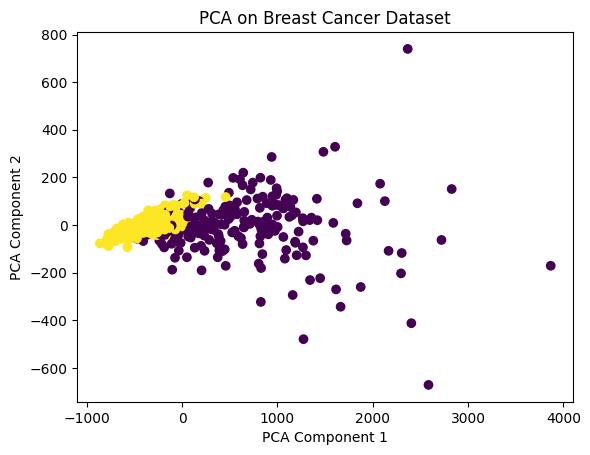

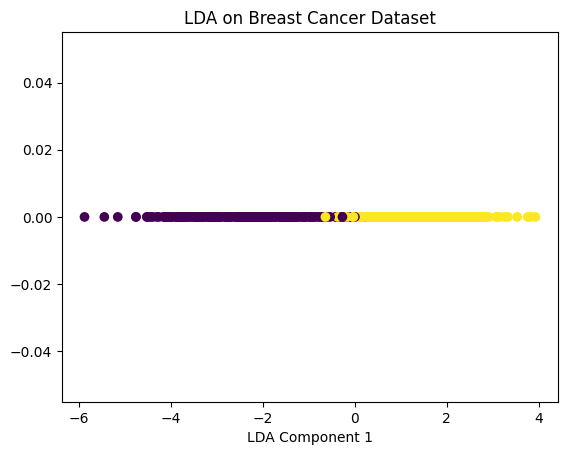

In [81]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on Breast Cancer Dataset')
plt.show()



plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis')
plt.xlabel('LDA Component 1')
plt.title('LDA on Breast Cancer Dataset')
plt.show()




### 2.4 What is the maximum variance explained by both the components in PCA and LDA. (10 Points)

In [82]:
import numpy as np
# Variance explained by PCA components
pca_explained_variance = pca.explained_variance_ratio_
print("PCA explained variance ratio:", pca_explained_variance)
print("Total variance explained by PCA:", np.sum(pca_explained_variance))

# Variance explained by LDA component
lda_explained_variance = lda.explained_variance_ratio_
print("LDA explained variance ratio:", lda_explained_variance)
print("Total variance explained by LDA:", np.sum(lda_explained_variance))


PCA explained variance ratio: [0.98204467 0.01617649]
Total variance explained by PCA: 0.9982211613741729
LDA explained variance ratio: [1.]
Total variance explained by LDA: 1.0


### 2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset. (5 Points)


Based on the variance explained and the nature of the breast cancer dataset, here are the points discussing the working of PCA and LDA and their suitability for the breast_cancer dataset:

1. **Principal Component Analysis (PCA)**:
   - **Working**: PCA aims to capture the maximum variance in the dataset by projecting it onto a lower-dimensional space defined by orthogonal components.
   - **Variance Explained**: The PCA components explain 98.2% and 1.6% of the variance respectively, totaling to 99.8% of the variance explained by the two principal components chosen.
   - **Suitability for Breast Cancer Dataset**: PCA is effective in reducing the dimensionality of the dataset while retaining most of the variance. It helps in visualizing the overall structure of the data but does not take into account class labels. This might limit its ability to maximize class separability in classification tasks.

2. **Linear Discriminant Analysis (LDA)**:
   - **Working**: LDA finds the linear combinations of features that best separate the classes in the dataset. It considers both the variance between classes and within classes.
   - **Variance Explained**: LDA explains 100% of the variance, which means it perfectly separates the classes in the dataset into distinct groups.
   - **Suitability for Breast Cancer Dataset**: LDA is highly suitable for the breast cancer dataset because it directly optimizes for class separability. By maximizing the between-class variance relative to the within-class variance, LDA can potentially enhance the classification performance by effectively distinguishing between malignant and benign tumors.

**Conclusion**:
- **LDA** is likely to be better suited for the breast cancer dataset compared to PCA. This is because LDA explicitly considers the class labels and aims to maximize the separation between different tumor types (malignant and benign). In contrast, PCA focuses more on capturing overall variance in the dataset without considering the specific class boundaries. Therefore, for tasks like diagnosing cancer based on tumor features, LDA's approach of maximizing class separability makes it the preferred choice over PCA.